# 1) Import Modules

In [1]:
#Standard data-sci libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

import matplotlib.pyplot as plt
import seaborn as sns


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#SKLearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesClassifier, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor, Lars, LassoLars,  ElasticNet, PassiveAggressiveRegressor, RANSACRegressor, SGDRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn import metrics
from sklearn.svm import SVR

#XGBoost
import xgboost as xgb

In [3]:
def rmse(a,b):
    return metrics.mean_squared_error(a,b)**0.5

# 2) Load data

In [4]:
# Loading Train data
train_row_size = 1000
train_data_filename = '13million data/train_set.csv'
train_df = pd.read_csv(train_data_filename, nrows=train_row_size)
train_df.drop(columns=['Household_ID','Row_ID'], inplace=True)
# train_df.to_csv('13million data/train.csv')
print(train_df.info())
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
Vehicle           1000 non-null int64
Calendar_Year     1000 non-null int64
Model_Year        1000 non-null int64
Blind_Make        1000 non-null object
Blind_Model       1000 non-null object
Blind_Submodel    1000 non-null object
Cat1              1000 non-null object
Cat2              1000 non-null object
Cat3              1000 non-null object
Cat4              1000 non-null object
Cat5              1000 non-null object
Cat6              1000 non-null object
Cat7              1000 non-null object
Cat8              1000 non-null object
Cat9              1000 non-null object
Cat10             1000 non-null object
Cat11             1000 non-null object
Cat12             999 non-null object
OrdCat            1000 non-null object
Var1              1000 non-null float64
Var2              1000 non-null float64
Var3              1000 non-null float64
Var4              1000 non-null float

,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,3,2005,2005,K,K.78,K.78.2,D,C,F,?,?,C,?,C,A,B,F,D,4,1.270533,0.999418,0.588154,0.908351,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0
1,2,2005,2003,Q,Q.22,Q.22.3,B,C,A,A,A,E,C,A,B,A,B,D,5,0.217951,0.567140,1.421206,0.485509,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0
2,1,2005,1998,AR,AR.41,AR.41.1,B,?,A,A,A,C,C,A,B,A,E,D,2,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
3,1,2006,1998,AR,AR.41,AR.41.1,B,?,A,A,A,C,C,A,B,B,B,B,2,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
4,2,2005,2001,D,D.20,D.20.0,J,C,B,?,?,D,?,A,B,A,B,B,5,0.563454,1.863975,1.814591,1.838605,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0


In [5]:
# Loading Test data
test_row_size = 100
test_data_filename = '13million data/test_set.csv'
test_df = pd.read_csv(test_data_filename, nrows=test_row_size)
test_df.drop(columns=['Household_ID','Row_ID'], inplace=True)
test_df.to_csv('13million data/test.csv')

print(test_df.info())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
Vehicle           100 non-null int64
Calendar_Year     100 non-null int64
Model_Year        100 non-null int64
Blind_Make        100 non-null object
Blind_Model       100 non-null object
Blind_Submodel    100 non-null object
Cat1              100 non-null object
Cat2              100 non-null object
Cat3              100 non-null object
Cat4              100 non-null object
Cat5              100 non-null object
Cat6              100 non-null object
Cat7              100 non-null object
Cat8              100 non-null object
Cat9              100 non-null object
Cat10             100 non-null object
Cat11             100 non-null object
Cat12             100 non-null object
OrdCat            100 non-null int64
Var1              100 non-null float64
Var2              100 non-null float64
Var3              100 non-null float64
Var4              100 non-null float64
Var5              100 

,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4
0,1,2008,2001,P,P.24,P.24.0,A,C,B,A,A,D,C,B,A,A,A,B,5,0.258125,1.777519,-0.013495,1.669468,0.330938,0.430648,-0.886198,3.461982,N,-0.23153,-0.266117,2.715490,-0.251419
1,1,2009,2001,P,P.24,P.24.0,A,C,B,A,A,D,C,B,A,B,A,D,5,0.258125,1.777519,-0.013495,1.669468,0.330938,0.430648,-0.886198,3.461982,M,-0.23153,-0.266117,-0.272337,-0.251419
2,1,2008,2003,Y,Y.29,Y.29.0,B,C,A,A,A,D,C,B,B,B,A,C,4,-0.119519,-0.124506,0.217908,-0.191039,0.527193,-0.231408,-0.665021,-0.131601,O,-0.23153,-0.266117,-0.272337,-0.251419
3,1,2009,2003,Y,Y.29,Y.29.0,B,C,A,A,A,D,C,B,B,A,A,B,4,-0.119519,-0.124506,0.217908,-0.191039,0.527193,-0.231408,-0.665021,-0.131601,O,-0.23153,-0.266117,-0.272337,-0.251419
4,1,2008,2006,AU,AU.14,AU.14.1,B,A,B,A,A,B,C,A,B,B,A,C,2,-0.143623,-0.297418,-0.383740,-0.275608,0.069263,-0.685256,-0.591295,-0.163872,O,-0.23153,-0.266117,-0.272337,-0.251419


# 3) Data Pre-processing

## 3.1) Handling Missing Data

In [6]:
train_df.replace("?", np.NaN, inplace=True)

missing_val = train_df.isnull().sum()
missing_val = missing_val[missing_val > 0]
print(missing_val)

Blind_Make        1  
Blind_Model       1  
Blind_Submodel    1  
Cat1              5  
Cat2              352
Cat4              512
Cat5              512
Cat6              5  
Cat7              610
Cat11             1  
Cat12             1  
OrdCat            1  
dtype: int64


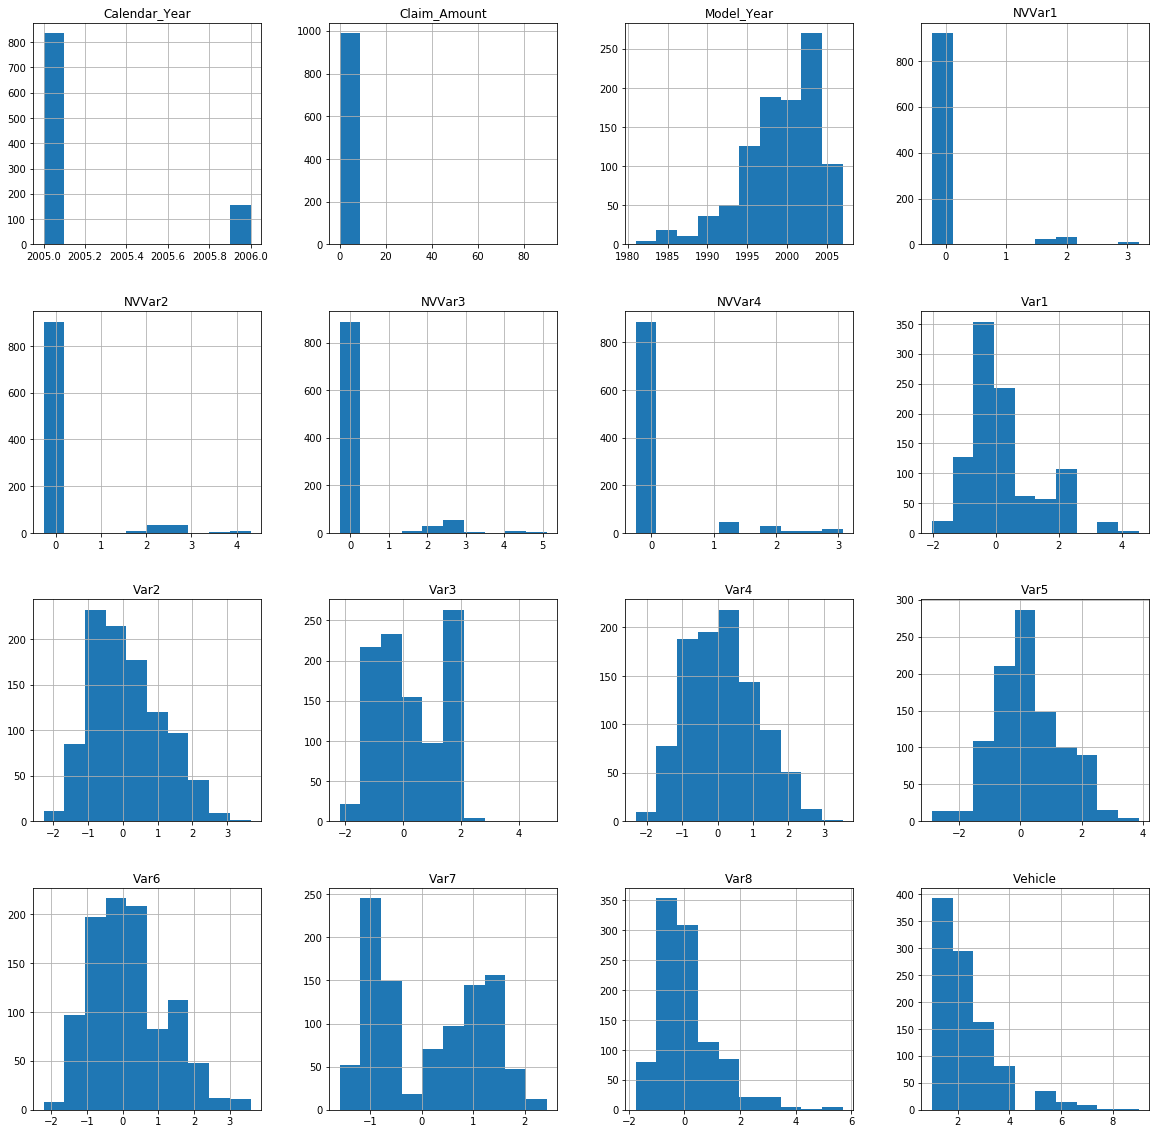

In [7]:
# drop columns that more than 10% missing data
train_df.dropna(thresh=int(len(train_df)*0.9), axis='columns', inplace=True)

# drop rows with NaNs
train_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)


avail_cols = list(set(train_df.columns) & set(test_df.columns))
train_df = train_df[avail_cols + ['Claim_Amount']]
test_df = test_df[avail_cols]

train_df.hist(figsize=(20,20))
plt.show()

## Study the target data

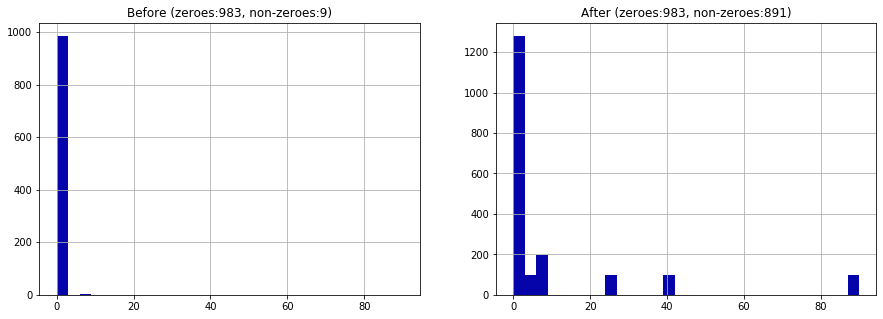

In [8]:
z_count = train_df['Claim_Amount'][train_df['Claim_Amount']==0].shape[0]
nz_count = train_df['Claim_Amount'][train_df['Claim_Amount']>0].shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(train_df['Claim_Amount'], bins=30, color='#0504aa')
ax1.set_title('Before (zeroes:'+str(z_count)+', non-zeroes:'+str(nz_count)+')')
ax1.grid()



# Balancing out the target data 
# train_df = train_df.append([train_df[train_df['Claim_Amount']>0]]*98, ignore_index=True)

#Balancing the data by selectively oversampling, to ensure each claim amount class is of a similar size:
class_width = 100
num_claims = df[df['Claim_Amount']>0]['Claim_Amount'].shape[0]
num_classes = int(df[df['Claim_Amount']>0]['Claim_Amount'].max()/class_width) + 1
target_num_claims = df.shape[0] * 20

for i in range(-1,num_classes):
    j = class_width*i
    class_claims = df[(df['Claim_Amount'] > j) & (df['Claim_Amount'] <= j + class_width)].shape[0]
    if class_claims == 0:
        continue
    else:
        repeat_n = int((target_num_claims/num_classes)/class_claims)
        df = df.append([df[(df['Claim_Amount'] > j) & (df['Claim_Amount'] <= j + class_width)]]*repeat_n, ignore_index=True)

# Shuffling the resampled data
idx = np.random.permutation(train_df.index)
train_df = train_df.reindex(idx)
train_df.reset_index(drop=True, inplace=True)



z_count = train_df['Claim_Amount'][train_df['Claim_Amount']==0].shape[0]
nz_count = train_df['Claim_Amount'][train_df['Claim_Amount']>0].shape[0]

ax2.hist(train_df['Claim_Amount'], bins=30, color='#0504aa')
ax2.set_title('After (zeroes:'+str(z_count)+', non-zeroes:'+str(nz_count)+')')
ax2.grid()
plt.show()

## 3.2) Filter out Outliers

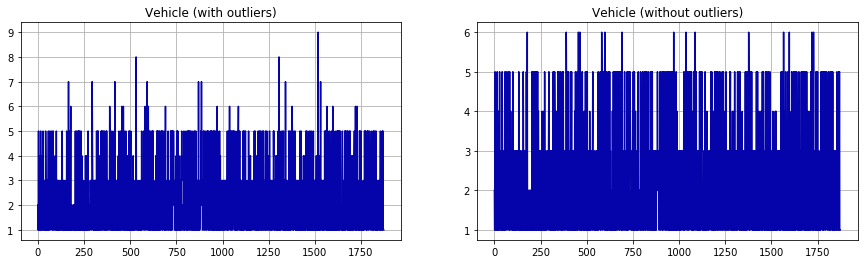

--------------------------------------------------------------------------------------------------


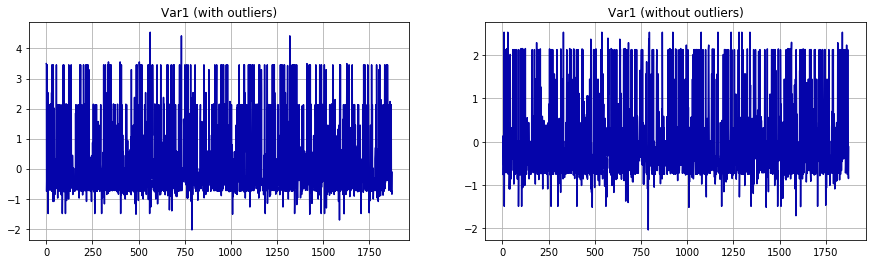

--------------------------------------------------------------------------------------------------


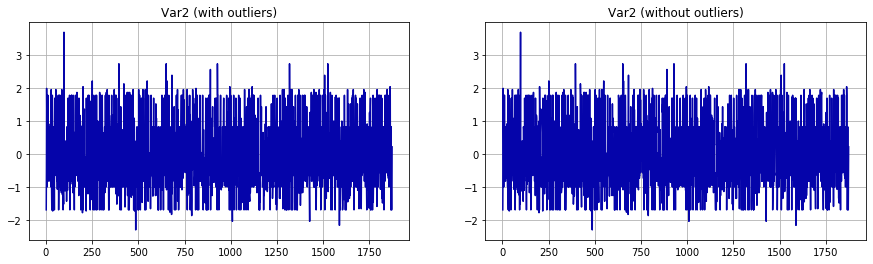

--------------------------------------------------------------------------------------------------


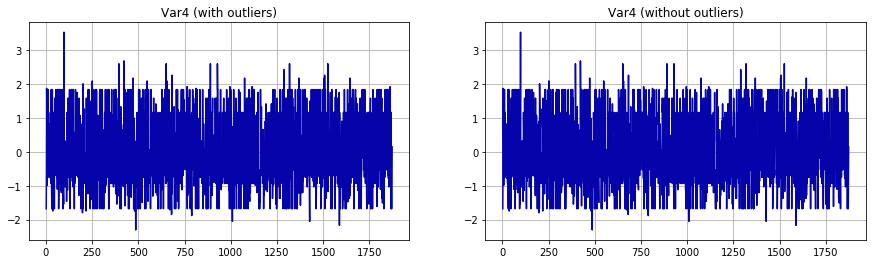

--------------------------------------------------------------------------------------------------


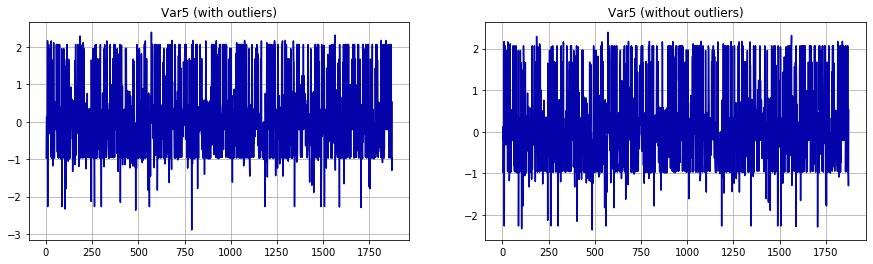

--------------------------------------------------------------------------------------------------


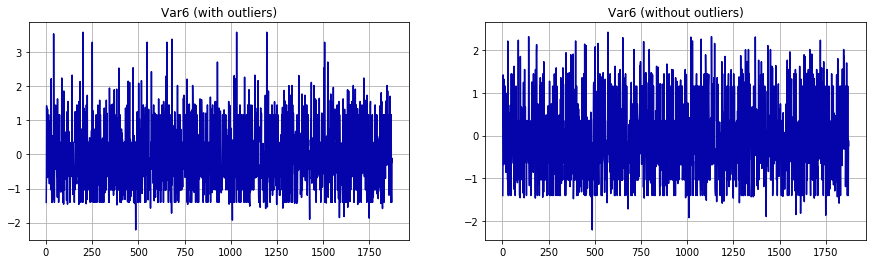

--------------------------------------------------------------------------------------------------


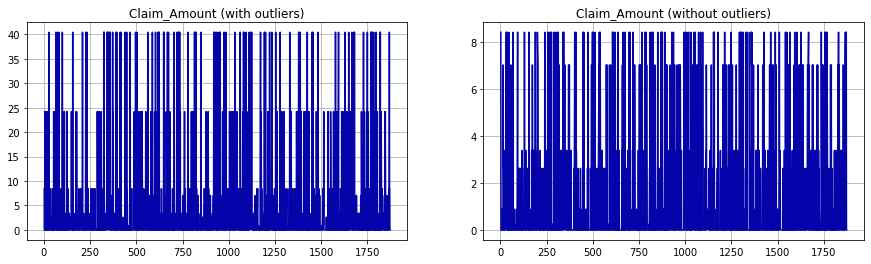

--------------------------------------------------------------------------------------------------


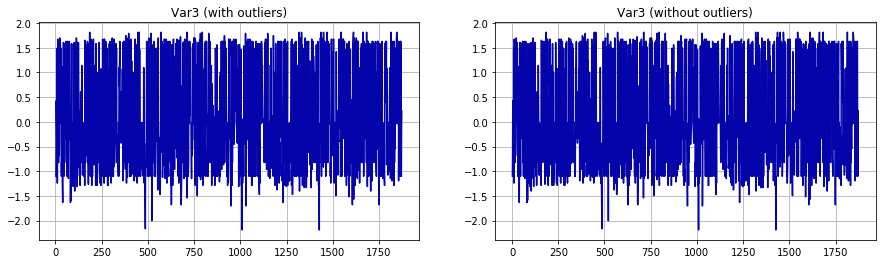

--------------------------------------------------------------------------------------------------


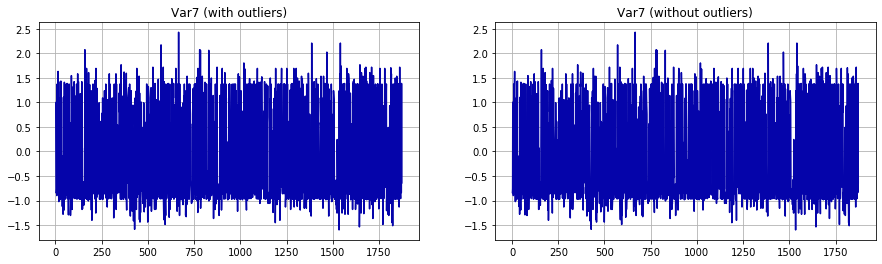

--------------------------------------------------------------------------------------------------


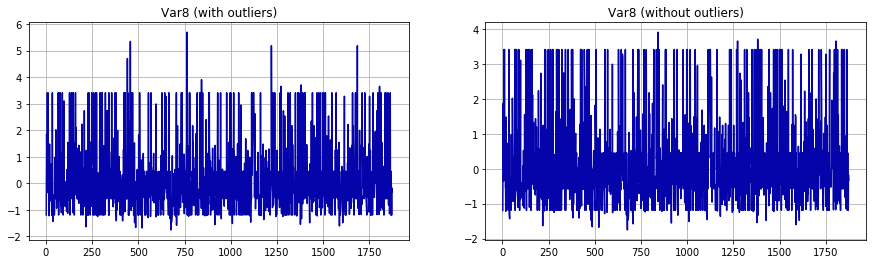

--------------------------------------------------------------------------------------------------


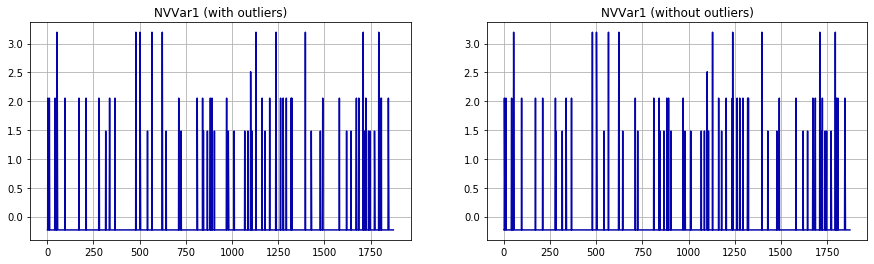

--------------------------------------------------------------------------------------------------


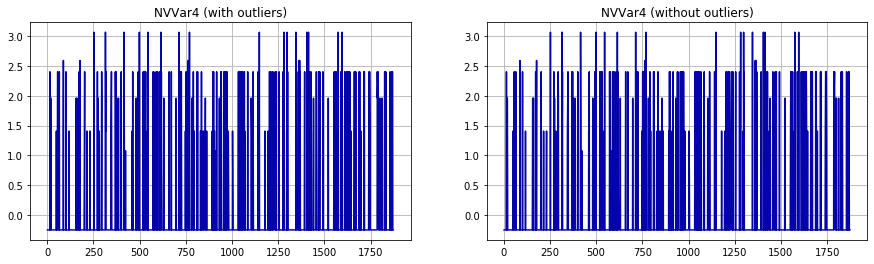

--------------------------------------------------------------------------------------------------


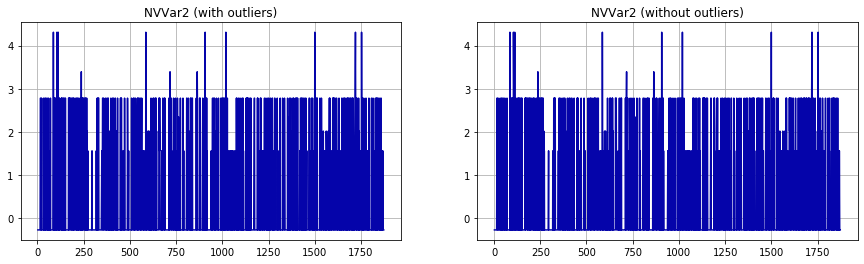

--------------------------------------------------------------------------------------------------


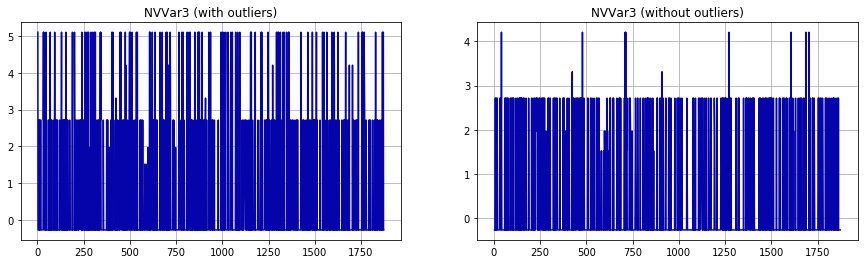

--------------------------------------------------------------------------------------------------


In [9]:
#Dropping rows with outliers
def clean_outliers(df, col):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    tolerance_threshold = 2
    low  = df[col].quantile(0.25) - tolerance_threshold*iqr
    high = df[col].quantile(0.75) + tolerance_threshold*iqr
    df_cleaned = df.loc[(df[col] > low) & (df[col] < high)]
    return df_cleaned


def outliers_before_after(before_df,after_df,col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    ax1.plot(before_df[col], color='#0504aa')
    ax1.set_title(col+' (with outliers)')
    ax1.grid()

    ax2.plot(after_df[col], color='#0504aa')
    ax2.set_title(col+' (without outliers)')
    ax2.grid()

    plt.show()
    print('--------------------------------------------------------------------------------------------------')
    
    
for col in ['Vehicle','Var1', 'Var2', 'Var4', 'Var5','Var6','Claim_Amount']:
    outliers_before_after(train_df,clean_outliers(train_df,col),col)
    train_df = clean_outliers(train_df,col)
    
# Filtering out Outliers manually
outliers_before_after(train_df,train_df[train_df['Var3'] < 3],'Var3')
train_df = train_df[train_df['Var3'] < 3]

outliers_before_after(train_df,train_df[train_df['Var7'] > -2],'Var7')
train_df = train_df[train_df['Var7'] > -2]

outliers_before_after(train_df,train_df[train_df['Var8'] < 4],'Var8')
train_df = train_df[train_df['Var8'] < 4]

for col in ['NVVar1','NVVar4']:
    outliers_before_after(train_df,train_df[train_df[col] < 4],col)
    train_df = train_df[train_df[col] < 4]
    
for col in ['NVVar2','NVVar3']:
    outliers_before_after(train_df,train_df[train_df[col] < 5],col)
    train_df = train_df[train_df[col] < 5]

## 3.3) Study the skewness

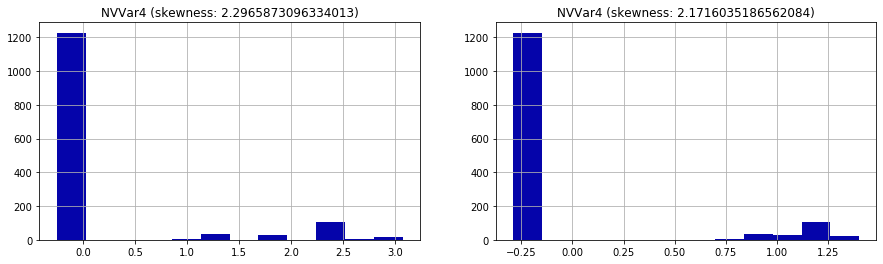

--------------------------------------------------------------------------------------------------


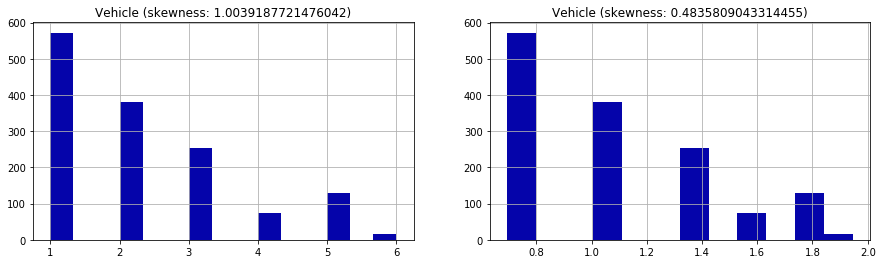

--------------------------------------------------------------------------------------------------


In [10]:
def skew_before_after(df,col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    ax1.hist(df[col], bins='auto', color='#0504aa')
    ax1.set_title(col+' (skewness: '+str(df[col].skew(axis = 0))+')')
    ax1.grid()

    df[col] = df[col].apply(np.log1p)

    ax2.hist(df[col], bins='auto', color='#0504aa')
    ax2.set_title(col+' (skewness: '+str(df[col].skew(axis = 0))+')')
    ax2.grid()

    plt.show()
    print('--------------------------------------------------------------------------------------------------')


for col in ['NVVar4','Vehicle']:
    skew_before_after(train_df,col)

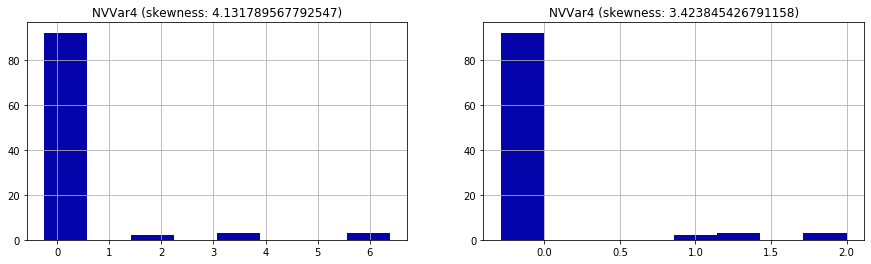

--------------------------------------------------------------------------------------------------


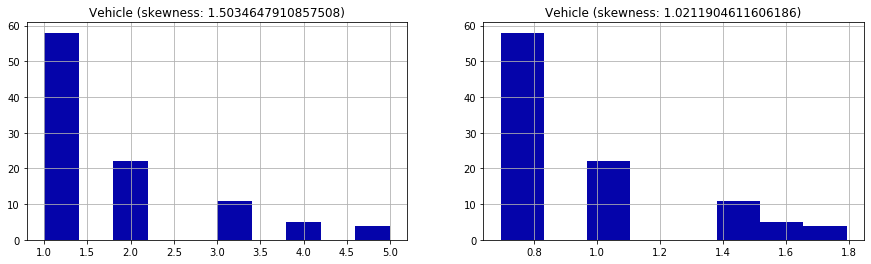

--------------------------------------------------------------------------------------------------


In [11]:
for col in ['NVVar4','Vehicle']:
    skew_before_after(test_df,col)

## 3.3) Hot One Encoding Categorical data

In [12]:
categorical_columns = [ x for x in train_df.columns if x[:3] == 'Cat' ]
categorical_columns += ['Blind_Make','Blind_Model','Blind_Submodel','NVCat']
train_df = pd.get_dummies(train_df, columns=categorical_columns, prefix = categorical_columns)

print(train_df.info())
train_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424 entries, 3 to 1873
Columns: 699 entries, Var5 to NVCat_O
dtypes: float64(14), int64(2), object(1), uint8(682)
memory usage: 1.1+ MB
None


,Var5,OrdCat,Var2,NVVar1,Var1,NVVar4,Calendar_Year,Model_Year,Var4,NVVar3,Var3,Var7,Vehicle,Var6,Var8,NVVar2,Claim_Amount,Cat9_A,Cat9_B,Cat1_A,Cat1_B,Cat1_C,Cat1_D,Cat1_E,Cat1_F,Cat1_G,Cat1_H,Cat1_I,Cat1_J,Cat3_A,Cat3_B,Cat3_C,Cat3_D,Cat3_E,Cat3_F,Cat11_A,Cat11_B,Cat11_C,Cat11_D,Cat11_E,Cat11_F,Cat10_A,Cat10_B,Cat10_C,Cat8_A,Cat8_B,Cat8_C,Cat6_B,Cat6_C,Cat6_D,Cat6_E,Cat6_F,Cat12_A,Cat12_B,Cat12_C,Cat12_D,Cat12_E,Cat12_F,Blind_Make_AC,Blind_Make_AF,Blind_Make_AH,Blind_Make_AI,Blind_Make_AJ,Blind_Make_AL,Blind_Make_AN,Blind_Make_AO,Blind_Make_AQ,Blind_Make_AR,Blind_Make_AU,Blind_Make_AV,Blind_Make_AX,Blind_Make_AY,Blind_Make_AZ,Blind_Make_BB,Blind_Make_BD,Blind_Make_BF,Blind_Make_BH,Blind_Make_BO,Blind_Make_BP,Blind_Make_BT,Blind_Make_BU,Blind_Make_BV,Blind_Make_BW,Blind_Make_BY,Blind_Make_BZ,Blind_Make_D,Blind_Make_G,Blind_Make_I,Blind_Make_J,Blind_Make_K,Blind_Make_L,Blind_Make_M,Blind_Make_N,Blind_Make_O,Blind_Make_P,Blind_Make_Q,Blind_Make_R,Blind_Make_W,Blind_Make_X,Blind_Make_Y,Blind_Make_Z,Blind_Model_AC.1,Blind_Model_AF.8,Blind_Model_AH.106,Blind_Model_AH.107,Blind_Model_AH.125,Blind_Model_AH.164,Blind_Model_AH.168,Blind_Model_AH.68,Blind_Model_AH.7,Blind_Model_AH.70,Blind_Model_AH.75,Blind_Model_AH.77,Blind_Model_AH.8,Blind_Model_AH.81,Blind_Model_AI.11,Blind_Model_AI.12,Blind_Model_AI.15,Blind_Model_AI.17,Blind_Model_AI.2,Blind_Model_AI.20,Blind_Model_AI.4,Blind_Model_AI.5,Blind_Model_AJ.1,Blind_Model_AJ.112,Blind_Model_AJ.122,Blind_Model_AJ.129,Blind_Model_AJ.14,Blind_Model_AJ.15,Blind_Model_AJ.35,Blind_Model_AJ.38,Blind_Model_AJ.40,Blind_Model_AJ.42,Blind_Model_AJ.48,Blind_Model_AJ.49,Blind_Model_AJ.5,Blind_Model_AJ.52,Blind_Model_AJ.54,Blind_Model_AJ.58,Blind_Model_AJ.59,Blind_Model_AJ.7,Blind_Model_AJ.77,Blind_Model_AJ.9,Blind_Model_AL.14,Blind_Model_AL.16,Blind_Model_AL.24,Blind_Model_AL.31,Blind_Model_AL.33,Blind_Model_AL.42,Blind_Model_AL.49,Blind_Model_AL.53,Blind_Model_AL.88,Blind_Model_AN.16,Blind_Model_AN.2,Blind_Model_AO.1,Blind_Model_AO.13,Blind_Model_AO.20,Blind_Model_AO.28,Blind_Model_AO.7,Blind_Model_AQ.17,Blind_Model_AQ.20,Blind_Model_AR.1,Blind_Model_AR.16,Blind_Model_AR.17,Blind_Model_AR.2,Blind_Model_AR.41,Blind_Model_AR.5,Blind_Model_AU.11,Blind_Model_AU.14,Blind_Model_AU.25,Blind_Model_AU.27,Blind_Model_AU.34,Blind_Model_AU.40,Blind_Model_AU.43,Blind_Model_AU.49,Blind_Model_AU.58,Blind_Model_AU.68,Blind_Model_AU.69,Blind_Model_AU.77,Blind_Model_AU.8,Blind_Model_AV.1,Blind_Model_AV.10,Blind_Model_AX.2,Blind_Model_AX.4,Blind_Model_AY.23,Blind_Model_AZ.21,Blind_Model_BB.10,Blind_Model_BD.3,Blind_Model_BF.10,Blind_Model_BF.36,Blind_Model_BF.42,Blind_Model_BH.11,Blind_Model_BH.18,Blind_Model_BH.20,Blind_Model_BH.29,Blind_Model_BH.7,Blind_Model_BO.15,Blind_Model_BO.3,Blind_Model_BO.35,Blind_Model_BO.36,Blind_Model_BO.38,Blind_Model_BO.44,Blind_Model_BO.47,Blind_Model_BO.52,Blind_Model_BO.53,Blind_Model_BO.58,Blind_Model_BO.65,Blind_Model_BP.17,Blind_Model_BP.18,Blind_Model_BP.23,Blind_Model_BT.11,Blind_Model_BT.16,Blind_Model_BT.43,Blind_Model_BT.49,Blind_Model_BT.50,Blind_Model_BT.63,Blind_Model_BU.1,Blind_Model_BU.20,Blind_Model_BU.36,Blind_Model_BU.38,Blind_Model_BU.5,Blind_Model_BV.11,Blind_Model_BV.17,Blind_Model_BV.20,Blind_Model_BV.3,Blind_Model_BV.6,Blind_Model_BV.8,Blind_Model_BW.112,Blind_Model_BW.115,Blind_Model_BW.131,Blind_Model_BW.132,Blind_Model_BW.156,Blind_Model_BW.157,Blind_Model_BW.166,Blind_Model_BW.167,Blind_Model_BW.168,Blind_Model_BW.174,Blind_Model_BW.176,Blind_Model_BW.178,Blind_Model_BW.3,Blind_Model_BW.37,Blind_Model_BW.42,Blind_Model_BW.48,Blind_Model_BW.49,Blind_Model_BW.57,Blind_Model_BW.95,Blind_Model_BW.96,Blind_Model_BY.10,Blind_Model_BZ.11,Blind_Model_BZ.33,Blind_Model_BZ.9,Blind_Model_D.1,Blind_Model_D.20,Blind_Model_D.25,Blind_Model_D.6,Blind_Model_D.7,Blind_Model_G.8,Blind_Model_I.12,Blind_Model_I.14,Blind_Model_I.29,Blind_Model_I.3,Blind_Model_J.4,Blind_Model_J.7,Blind_Model_K.1,Blind_Model_K.13,Blind_Model_K.15,Blind_Model_K.2,Blind_Model_K.3,Blind_Model_K.31,Blind

In [13]:
categorical_columns = [ x for x in test_df.columns if x[:3] == 'Cat' ]
categorical_columns += ['Blind_Make','Blind_Model','Blind_Submodel','NVCat']
test_df = pd.get_dummies(test_df, columns=categorical_columns, prefix = categorical_columns)

print(test_df.info())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 166 entries, Var5 to NVCat_O
dtypes: float64(13), int64(3), uint8(150)
memory usage: 27.3 KB
None


,Var5,OrdCat,Var2,NVVar1,Var1,NVVar4,Calendar_Year,Model_Year,Var4,NVVar3,Var3,Var7,Vehicle,Var6,Var8,NVVar2,Cat9_A,Cat9_B,Cat1_A,Cat1_B,Cat1_E,Cat1_G,Cat3_A,Cat3_B,Cat3_D,Cat3_F,Cat11_A,Cat11_B,Cat11_C,Cat11_D,Cat11_E,Cat11_F,Cat10_A,Cat10_B,Cat10_C,Cat8_A,Cat8_B,Cat8_C,Cat6_B,Cat6_C,Cat6_D,Cat6_E,Cat6_F,Cat12_B,Cat12_C,Cat12_D,Cat12_E,Cat12_F,Blind_Make_AN,Blind_Make_AO,Blind_Make_AQ,Blind_Make_AR,Blind_Make_AU,Blind_Make_BF,Blind_Make_BH,Blind_Make_BP,Blind_Make_BT,Blind_Make_BU,Blind_Make_BV,Blind_Make_BW,Blind_Make_I,Blind_Make_J,Blind_Make_K,Blind_Make_L,Blind_Make_N,Blind_Make_O,Blind_Make_P,Blind_Make_Q,Blind_Make_X,Blind_Make_Y,Blind_Model_AN.2,Blind_Model_AO.13,Blind_Model_AO.2,Blind_Model_AO.21,Blind_Model_AQ.20,Blind_Model_AR.1,Blind_Model_AU.14,Blind_Model_AU.58,Blind_Model_BF.11,Blind_Model_BF.14,Blind_Model_BF.36,Blind_Model_BF.45,Blind_Model_BH.18,Blind_Model_BP.18,Blind_Model_BP.6,Blind_Model_BT.50,Blind_Model_BU.36,Blind_Model_BV.9,Blind_Model_BW.79,Blind_Model_I.26,Blind_Model_J.8,Blind_Model_K.103,Blind_Model_K.31,Blind_Model_K.65,Blind_Model_K.7,Blind_Model_L.20,Blind_Model_N.16,Blind_Model_O.23,Blind_Model_O.7,Blind_Model_P.18,Blind_Model_P.24,Blind_Model_Q.33,Blind_Model_X.20,Blind_Model_X.24,Blind_Model_X.28,Blind_Model_X.45,Blind_Model_Y.10,Blind_Model_Y.12,Blind_Model_Y.29,Blind_Model_Y.34,Blind_Submodel_AN.2.1,Blind_Submodel_AO.13.1,Blind_Submodel_AO.2.5,Blind_Submodel_AO.21.0,Blind_Submodel_AQ.20.0,Blind_Submodel_AR.1.1,Blind_Submodel_AU.14.0,Blind_Submodel_AU.14.1,Blind_Submodel_AU.58.0,Blind_Submodel_BF.11.3,Blind_Submodel_BF.14.2,Blind_Submodel_BF.36.4,Blind_Submodel_BF.36.7,Blind_Submodel_BF.45.2,Blind_Submodel_BH.18.9,Blind_Submodel_BP.18.0,Blind_Submodel_BP.6.0,Blind_Submodel_BT.50.2,Blind_Submodel_BU.36.0,Blind_Submodel_BV.9.1,Blind_Submodel_BW.79.2,Blind_Submodel_I.26.0,Blind_Submodel_J.8.2,Blind_Submodel_K.103.1,Blind_Submodel_K.31.0,Blind_Submodel_K.65.3,Blind_Submodel_K.7.1,Blind_Submodel_K.7.2,Blind_Submodel_K.7.3,Blind_Submodel_L.20.1,Blind_Submodel_L.20.2,Blind_Submodel_N.16.0,Blind_Submodel_O.23.0,Blind_Submodel_O.7.0,Blind_Submodel_P.18.0,Blind_Submodel_P.24.0,Blind_Submodel_Q.33.5,Blind_Submodel_X.20.1,Blind_Submodel_X.24.9,Blind_Submodel_X.28.2,Blind_Submodel_X.45.10,Blind_Submodel_X.45.4,Blind_Submodel_X.45.8,Blind_Submodel_Y.10.0,Blind_Submodel_Y.10.2,Blind_Submodel_Y.12.0,Blind_Submodel_Y.29.0,Blind_Submodel_Y.34.1,Blind_Submodel_Y.34.3,NVCat_B,NVCat_E,NVCat_J,NVCat_L,NVCat_M,NVCat_N,NVCat_O
0,0.330938,5,1.777519,-0.23153,0.258125,-0.289576,2008,2001,1.669468,2.715490,-0.013495,-0.886198,0.693147,0.430648,3.461982,-0.266117,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.330938,5,1.777519,-0.23153,0.258125,-0.289576,2009,2001,1.669468,-0.272337,-0.013495,-0.886198,0.693147,0.430648,3.461982,-0.266117,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.527193,4,-0.124506,-0.23153,-0.119519,-0.289576,2008,2003,-0.191039,-0.272337,0.217908,-0.665021,0.693147,-0.231408,-0.131601,-0.266117,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0.527193,4,-0.124506,-0.23153,-0.119519,-0.289576,2009,2003,-0.191039,-0.272337,0.217908,-0.665021,0.693147,-0.231408,-0.131601,-0.266117,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0

## Data split into X and Y

In [14]:
avail_cols = list(set(train_df.columns) & set(test_df.columns))
train_df = train_df[avail_cols + ['Claim_Amount']]
test_df = test_df[avail_cols]

X = train_df.drop(['Claim_Amount'], axis=1)
print('Train X:',X.shape)

Y = train_df['Claim_Amount']
print('Train Y:',Y.shape)

X_test = test_df
print('Test X:',X_test.shape)

Train X: (1424, 121)
Train Y: (1424,)
Test X: (100, 121)


## Splitting the dataset into Training set and Test set

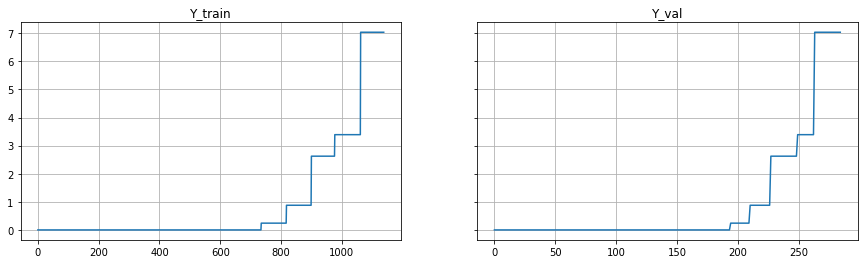

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2,random_state=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4), sharey=True)
ax1.plot(np.sort(Y_train))
ax1.set_title('Y_train')
ax1.grid()

ax2.plot(np.sort(Y_val))
ax2.set_title('Y_val')
ax2.grid()

plt.show()

## Feature Scaling

In [16]:
col_names = X.columns

# scaling split train and validation data
mm_scaler = MinMaxScaler()
X_train = pd.DataFrame(mm_scaler.fit_transform(X_train), columns=col_names)
X_val = pd.DataFrame(mm_scaler.transform(X_val), columns=col_names)

# scaling full train and test data
mm_scaler = MinMaxScaler()
X = pd.DataFrame(mm_scaler.fit_transform(X), columns=col_names)
X_test = pd.DataFrame(mm_scaler.transform(X_test), columns=col_names)

## Feature Selection (Univariate Filter Method)

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

k = 10
Kbestfeatures = SelectKBest(score_func=f_regression, k=k)
fit = Kbestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(k,'Score'))  #print K best features
best_features = featureScores.nlargest(k,'Score')['Specs'].tolist()

# featureScores = featureScores[featureScores['Score'] > 10]
# print(featureScores.sort_values(by=['Score'],ascending=False))
# best_features = featureScores['Specs'].tolist()

           Specs       Score
56  NVVar2        866.221323
74  NVVar4        662.739267
89  Cat12_D       379.601672
93  Var5          290.613657
65  Var1          208.163295
58  Cat11_B       181.182557
70  NVCat_M       162.785756
40  Blind_Make_L  141.925477
9   Cat8_A        133.332158
1   Cat12_B       112.465047


In [18]:
X_train = X_train[best_features].copy()
X_val = X_val[best_features].copy()

X_test = X_test[best_features].copy()

X_train.head()

,NVVar2,NVVar4,Cat12_D,Var5,Var1,Cat11_B,NVCat_M,Blind_Make_L,Cat8_A,Cat12_B
0,0.666667,0.000000,0.0,0.45500,0.246212,0.0,0.0,0.0,1.0,0.0
1,0.666667,0.000000,1.0,0.54375,0.318182,0.0,0.0,1.0,1.0,0.0
2,0.000000,0.000000,0.0,0.31625,0.314394,0.0,0.0,0.0,1.0,1.0
3,0.400000,0.894752,1.0,0.93125,0.905303,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.000000,1.0,0.60750,0.407197,0.0,1.0,0.0,0.0,0.0


## Evaluate & Fit Models

In [19]:
def eval_model(model,X,Y,data_name):
    Y = Y.values
    Y_predicted = model.predict(X)
    rmse = np.sqrt(metrics.mean_squared_error(Y,Y_predicted))
    print('RMSE ('+data_name+'): ',rmse)
    
    
    plt.figure(figsize=(15,8))
    plt.plot(Y, '-',label='Y ('+data_name+')')
    plt.plot(Y_predicted, '-',label="Y (Predicted)")
    plt.title('RMSE ('+data_name+'): ' + str(rmse))
    plt.legend()
    plt.grid()

    plt.show()
    print('----------------------------------------------------------------------------------------------------')
    
    
def three_way_eval(model):
    model.fit(X_train,Y_train)
    eval_model(model,X_train,Y_train,'Train set')
    eval_model(model,X_val,Y_val,'Validation set')

    model.fit(X[X_test.columns],Y)
    eval_model(model,X[X_test.columns],Y,'Train & Test set')

In [20]:
all_models = {
    "AdaBoostRegressor": AdaBoostRegressor(),
    "BaggingRegressor": BaggingRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "SGDRegressor": SGDRegressor(),
    "TheilSenRegressor": TheilSenRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor()
}

In [21]:
result = {}
kfold = KFold(n_splits=10, shuffle = True, random_state=6)
scoring = 'neg_mean_squared_error'
for name,model in all_models.items():
#     model.fit(X_train, Y_train)
#     predictions = model.predict(X_test)
#     predictions[predictions<0] = 0
#     result.append(rmse(predictions,Y_test))
    result[name] = abs(cross_val_score(model, X, Y, cv=kfold, scoring=scoring).mean()) ** 0.5
    
model_result= pd.DataFrame(data=result.values(),index=result.keys(),columns=['rmse']).sort_values(by='rmse' , ascending=True)
print(model_result)

                                rmse
ExtraTreesRegressor         0.124247
AdaBoostRegressor           0.169145
GradientBoostingRegressor   0.211636
RandomForestRegressor       0.217707
BaggingRegressor            0.218522
DecisionTreeRegressor       0.265652
KNeighborsRegressor         0.295143
SGDRegressor                0.900422
TheilSenRegressor           0.946001
PassiveAggressiveRegressor  1.155349


RMSE against Validation set: 1.2219911351718222
RMSE (Train set):  1.444808243863974


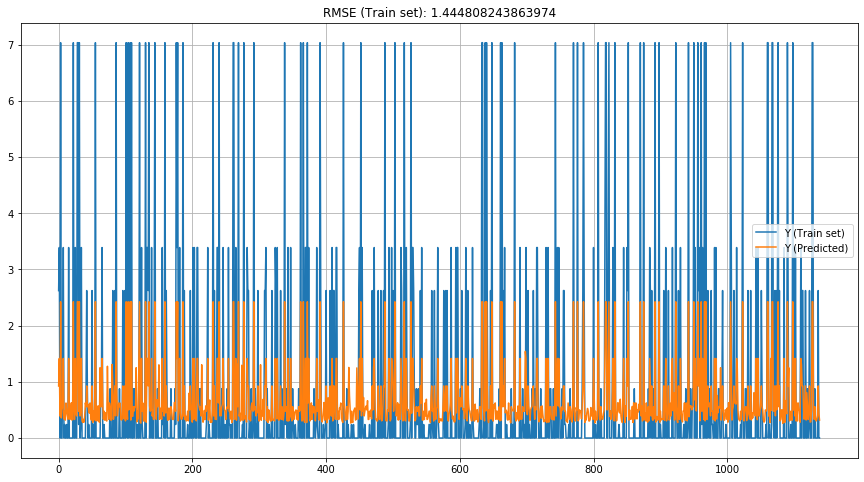

----------------------------------------------------------------------------------------------------
RMSE (Validation set):  1.4932623344385185


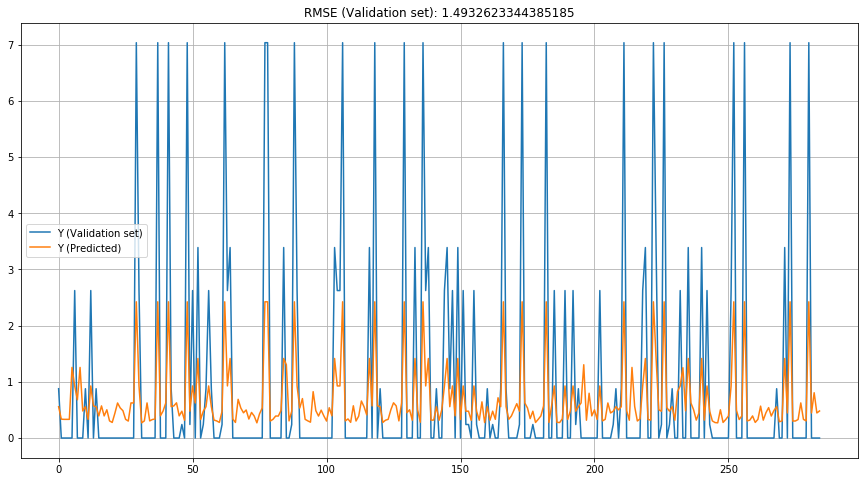

----------------------------------------------------------------------------------------------------
RMSE (Train & Test set):  1.453537044581259


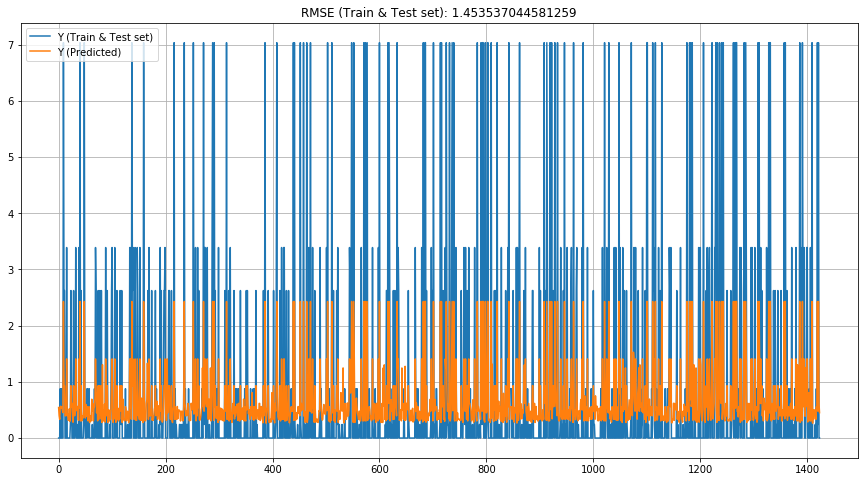

----------------------------------------------------------------------------------------------------


In [22]:
xgb_model = xgb.XGBRegressor(learning_rate=0.05, max_depth=12, n_estimators=10, alpha=10, 
                                 objective ='reg:squarederror', colsample_bytree = 0.3)
xgb_model.fit(X_train,Y_train)
y_pred = xgb_model.predict(X_val)
print('RMSE against Validation set:',rmse(Y_val,y_pred)**0.5)

three_way_eval(xgb_model)

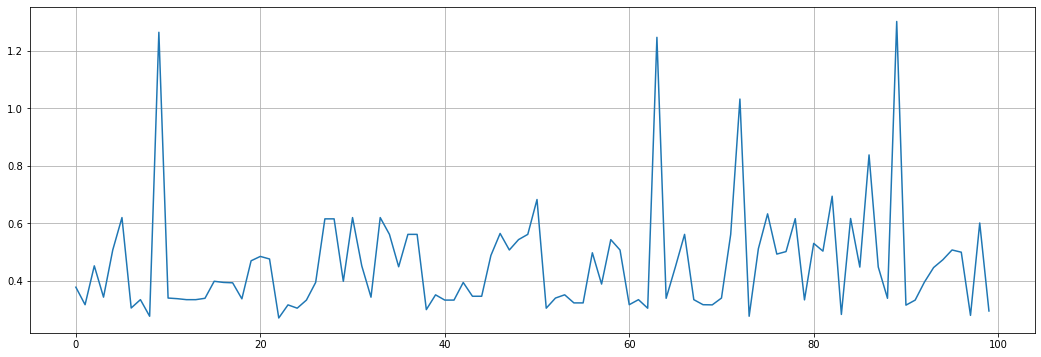

In [23]:
xgb_model = xgb.XGBRegressor(learning_rate=0.05, max_depth=12, n_estimators=10, alpha=10, 
                                 objective ='reg:squarederror', colsample_bytree = 0.3)
xgb_model.fit(X[X_test.columns],Y)
y_pred = xgb_model.predict(X_test)

plt.figure(figsize=(18,6))
plt.plot(y_pred)
plt.grid()
plt.show()